**Author :** Rutendo F. Sigauke

**Input  :** 

1. GENIE3 ranked bidirectional gene pairs  (*chr*_GENIE3_ranks.tsv.gz)
        
**Output :**

1. Figures (summary of ranks)

# Load libraries

In [1]:
library(GENIE3)
library(data.table)
library(ggplot2)
library(cowplot)
set.seed(123) # For reproducibility of results

# Functions

## Plot ranks

In [2]:
plot_genie3_ranks <- function(gene_linkList_genes, tissue_id, gene_id){
    
    gene_linkList_tissue <- subset(gene_linkList_genes, 
                                tissue==tissue_id &
                                targetGene==gene_id)
    print(head(gene_linkList_tissue, 2))
    
    gene_linkList_type <- data.table(ranks=c(nrow(gene_linkList_tissue)+1),
                                  tissue=c(tissue_id))
    print(head(gene_linkList_type, 2))
    
    gene_id_new <- as.character(lapply(strsplit(gene_id, ':'), `[`, 1))
    
    rank_plot <- ggplot(data=gene_linkList_type, 
                        aes(y=tissue, x=ranks)) +
    geom_bar(stat="identity", fill = 'white', color='black') +
    geom_point(data = gene_linkList_tissue,
               aes(y = tissue, 
                   x = ranks,
                   color=as.character(gtex)), 
               shape=124, 
               size=10, 
               alpha=1) +
    xlab("Pair Rank") +
    ylab(" ") +
    ggtitle(paste0(gene_id_new, " bidirectional pairs ranked")) +
    theme_classic() +
    scale_colour_manual(name="GTEx",
                        values = c("grey20", "red")) +
    scale_y_discrete(expand = c(0, 0)) +
    scale_x_continuous(expand = c(0, 0), 
                       breaks = gene_linkList_tissue$ranks,
                       labels = scales::comma) +
    theme(plot.title = element_text(hjust = 0.5, 
                                    face = "plain",
                                    size = 28),
          axis.title = element_text(size = 26), 
          axis.text = element_text(size = 26),
          axis.text.x = element_text(size = 24),
          legend.title = element_text(size = 22),
          legend.text = element_text(size = 20))
    
    print(rank_plot)
    
}

# GENIE3 results

In [5]:
genie_path <- '/Users/rusi2317/projects/meta_analysis_qc/hg38/processed_data/genie3_ranked_bidir_gene_pairs'

##get paths for the tables
genie_path_files <- list.files(path=genie_path, 
                              pattern="*GENIE3_ranks.tsv.gz", 
                                   full.names=TRUE)
##load correlations
genie_path_DT_list <- lapply(genie_path_files, 
                                   data.table::fread) 


In [6]:
genie_path_DT <- do.call(rbind, genie_path_DT_list)
nrow(genie_path_DT)
head(genie_path_DT)

[1] 1407498

regulatoryGene,targetGene,weight,pair_id,gtex,tissue,ranks
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
chr1:33036652-33037238,A3GALT2:NM_001080438.1,0.93466462,A3GALT2:NM_001080438.1~chr1:33036652-33037238,0,blood,1
chr1:33242850-33243170,A3GALT2:NM_001080438.1,0.03795462,A3GALT2:NM_001080438.1~chr1:33242850-33243170,0,blood,2
chr1:33224694-33224966,A3GALT2:NM_001080438.1,0.02738077,A3GALT2:NM_001080438.1~chr1:33224694-33224966,0,blood,3
chr1:32349126-32349590,A3GALT2:NM_001080438.1,0.28754345,A3GALT2:NM_001080438.1~chr1:32349126-32349590,0,breast,1
chr1:32992392-32992740,A3GALT2:NM_001080438.1,0.20546709,A3GALT2:NM_001080438.1~chr1:32992392-32992740,0,breast,2
chr1:32989317-32989605,A3GALT2:NM_001080438.1,0.15960173,A3GALT2:NM_001080438.1~chr1:32989317-32989605,0,breast,3


# Analysis

## All genes and their linked bidirectionals

In [7]:
length(unique(genie_path_DT$targetGene))

[1] 23552

In [8]:
genie_path_DT_rank1 <- subset(genie_path_DT, ranks < 10 & gtex == 1)
length(unique(genie_path_DT_rank1$pair_id))
nrow(genie_path_DT_rank1)
head(genie_path_DT_rank1, 11)

[1] 56165

[1] 80741

regulatoryGene,targetGene,weight,pair_id,gtex,tissue,ranks
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
chr1:33434950-33435556,A3GALT2:NM_001080438.1,0.07238650,A3GALT2:NM_001080438.1~chr1:33434950-33435556,1,breast,6
chr1:33433499-33434003,A3GALT2:NM_001080438.1,0.03624890,A3GALT2:NM_001080438.1~chr1:33433499-33434003,1,breast,8
chr1:33430803-33431279,A3GALT2:NM_001080438.1,0.08904395,A3GALT2:NM_001080438.1~chr1:33430803-33431279,1,heart,5
chr1:32975419-32975647,A3GALT2:NM_001080438.1,0.24531654,A3GALT2:NM_001080438.1~chr1:32975419-32975647,1,lung,2
chr1:33080837-33081313,A3GALT2:NM_001080438.1,0.05320977,A3GALT2:NM_001080438.1~chr1:33080837-33081313,1,prostate,7
chr1:33127176-33127592,A3GALT2:NM_001080438.1,0.05163905,A3GALT2:NM_001080438.1~chr1:33127176-33127592,1,prostate,8
chr1:33434950-33435556,A3GALT2:NM_001080438.1,0.10400524,A3GALT2:NM_001080438.1~chr1:33434950-33435556,1,skin,1
chr1:33430803-33431279,A3GALT2:NM_001080438.1,0.08804173,A3GALT2:NM_001080438.1~chr1:33430803-33431279,1,skin,5
chr1:33443820-33444234,A3GALT2:NM_001080438.1,0.08771772,A3GALT2:NM_001080438.1~chr1:33443820-33444234,1,skin,6


In [9]:
genie_path_DT_gtex <- subset(genie_path_DT, gtex == 1)
length(unique(genie_path_DT_gtex$pair_id))


[1] 79848

In [10]:
(length(unique(genie_path_DT_rank1$pair_id))/length(unique(genie_path_DT_gtex$pair_id)))*100

[1] 70.3399

In [11]:
max(genie_path_DT$ranks)


[1] 226

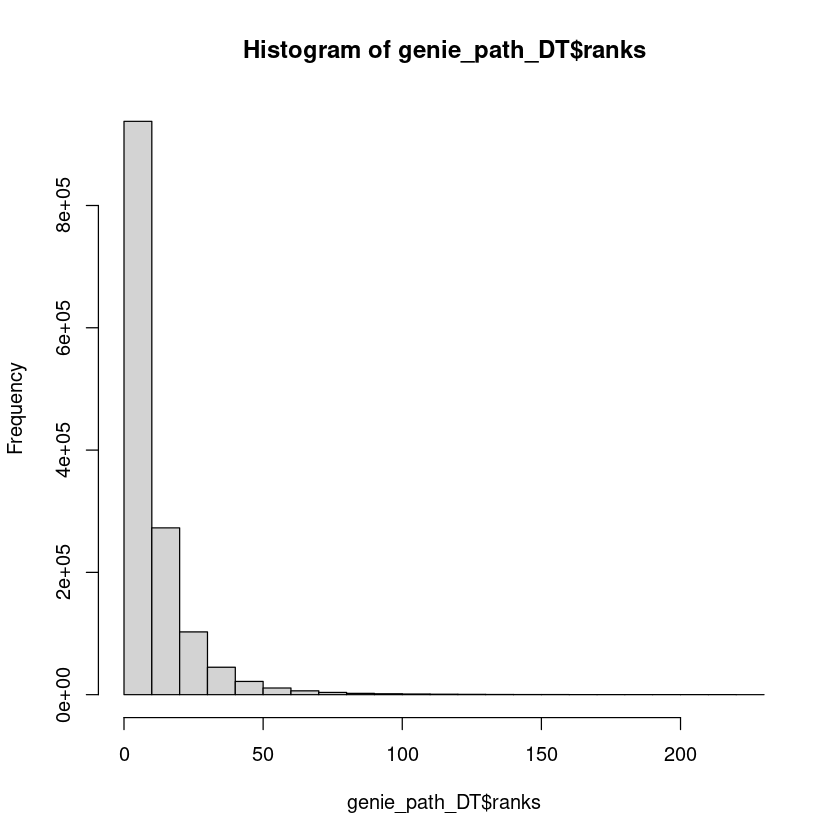

In [12]:
hist(genie_path_DT$ranks)

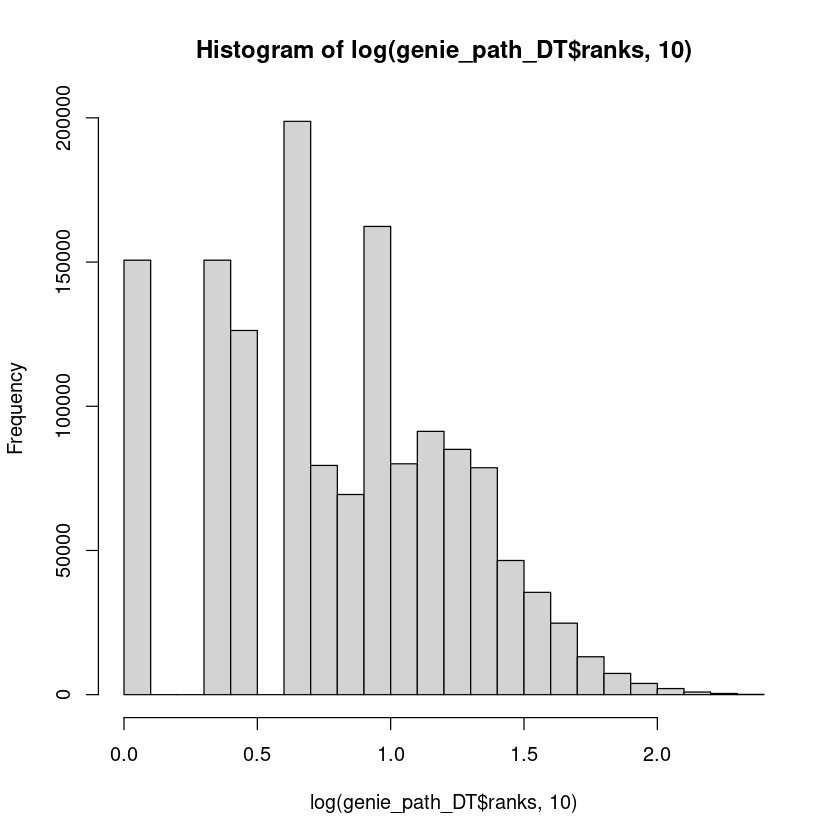

In [13]:
hist(log(genie_path_DT$ranks, 10))

In [14]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}


In [15]:
print("------------------------------------")
print("GTEx Pairs")
print("----------")
genie_path_DT_gtex <- subset(genie_path_DT, gtex == 1)
min_gtex_ranks <- min(genie_path_DT_gtex$ranks)
median_gtex_ranks <- median(genie_path_DT_gtex$ranks)
max_gtex_ranks <- max(genie_path_DT_gtex$ranks)
mode_gtex_ranks <- getmode(genie_path_DT_gtex$ranks)
print(paste0("Min = ", min_gtex_ranks))
print(paste0("Median = ", median_gtex_ranks))
print(paste0("Max = ", max_gtex_ranks))
print(paste0("Mode = ", mode_gtex_ranks))

print("------------------------------------")
print("Non-GTEx Pairs")
print("--------------")
genie_path_DT_non_gtex <- subset(genie_path_DT, gtex == 0)
min_nongtex_ranks <- min(genie_path_DT_non_gtex$ranks)
median_nongtex_ranks <- median(genie_path_DT_non_gtex$ranks)
max_nongtex_ranks <- max(genie_path_DT_non_gtex$ranks)
mode_nongtex_ranks <- getmode(genie_path_DT_non_gtex$ranks)
print(paste0("Min = ", min_nongtex_ranks))
print(paste0("Median = ", median_nongtex_ranks))
print(paste0("Max = ", max_nongtex_ranks))
print(paste0("Mode = ", mode_nongtex_ranks))
print("------------------------------------")

[1] "------------------------------------"
[1] "GTEx Pairs"
[1] "----------"
[1] "Min = 1"
[1] "Median = 5"
[1] "Max = 213"
[1] "Mode = 1"
[1] "------------------------------------"
[1] "Non-GTEx Pairs"
[1] "--------------"
[1] "Min = 1"
[1] "Median = 7"
[1] "Max = 226"
[1] "Mode = 2"
[1] "------------------------------------"


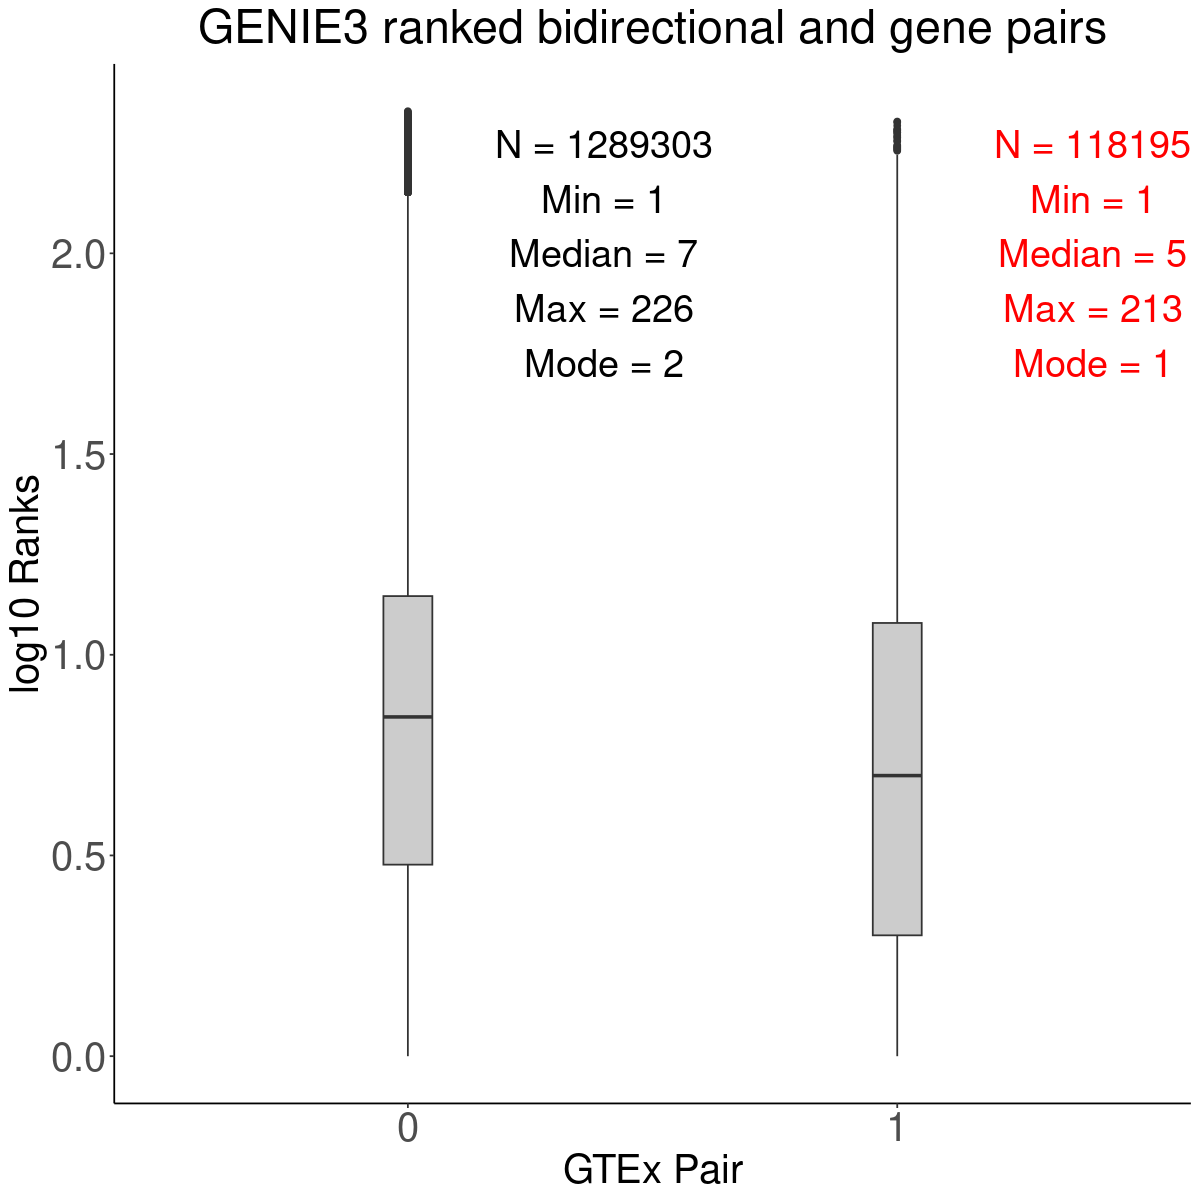

In [16]:
options(repr.plot.width=10, repr.plot.height=10)

all_ranks_plot <- ggplot(genie_path_DT, 
                         aes(x=as.factor(gtex), y=log(ranks, 10))) + 
    labs(title="GENIE3 ranked bidirectional and gene pairs",
         x="GTEx Pair", y = "log10 Ranks") +
    geom_boxplot(width=0.1, fill='gray80') +
    theme_classic() +
    annotate("text", x = 1.4,
         y = 2, size=8, 
         label = paste0(paste0("N = ", nrow(genie_path_DT_non_gtex)), "\n",
             paste0("Min = ", min_nongtex_ranks),"\n",
                       paste0("Median = ", median_nongtex_ranks),"\n",
                       paste0("Max = ", max_nongtex_ranks),"\n",
                       paste0("Mode = ", mode_nongtex_ranks)),
         color='black') +
    annotate("text", x = 2.4,
         y = 2, size=8,
         label = paste0(paste0("N = ", nrow(genie_path_DT_gtex)), "\n",
             paste0("Min = ", min_gtex_ranks),"\n",
                       paste0("Median = ", median_gtex_ranks,"\n",
                       paste0("Max = ", max_gtex_ranks),"\n",
                       paste0("Mode = ", mode_gtex_ranks))),
         color='red') +
    theme(plot.title = element_text(hjust = 0.5, 
                                    face = "plain",
                                    size = 28),
          axis.title = element_text(size = 24), 
          axis.text = element_text(size = 24),
          axis.text.x = element_text(size = 24),
          legend.title = element_text(size = 20),
          legend.text = element_text(size = 18))

all_ranks_plot

In [17]:
ggsave(all_ranks_plot, width = 10, height = 10,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_all_ranks_plot.pdf',
      bg = "transparent")

ggsave(all_ranks_plot, width = 10, height = 10,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_all_ranks_plot.png',
      bg = "transparent")

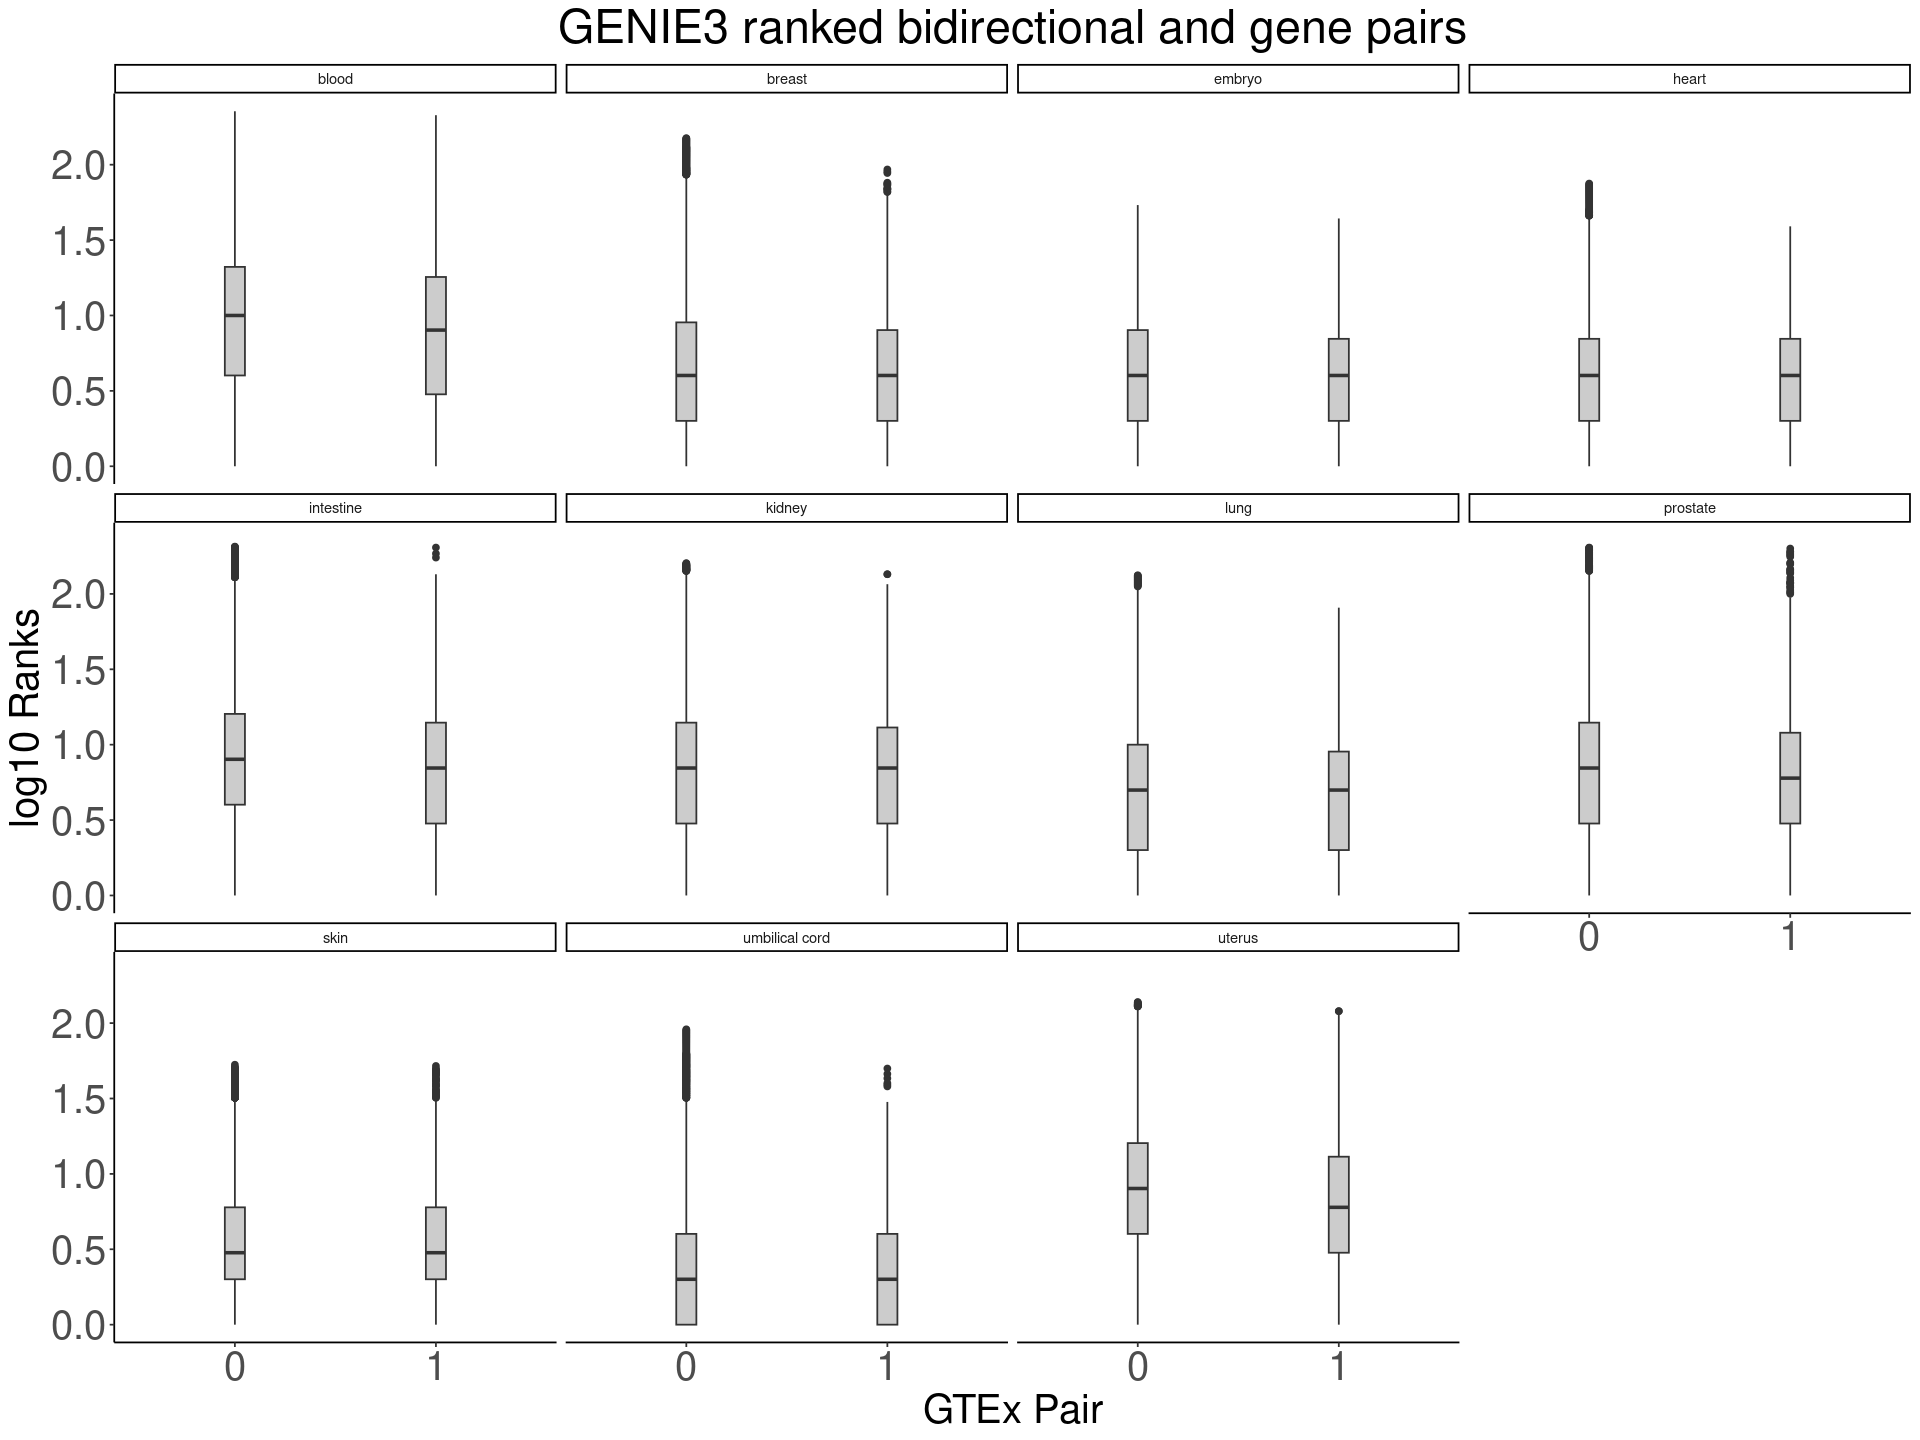

In [18]:
options(repr.plot.width=16, repr.plot.height=12)

all_ranks_plot2 <- ggplot(genie_path_DT, 
                         aes(x=as.factor(gtex), y=log(ranks, 10))) + 
    labs(title="GENIE3 ranked bidirectional and gene pairs",
         x="GTEx Pair", y = "log10 Ranks") +
    facet_wrap(vars(tissue), nrow = 3) +
    geom_boxplot(width=0.1, fill='gray80') +
    theme_classic() +
    theme(plot.title = element_text(hjust = 0.5, 
                                    face = "plain",
                                    size = 28),
          axis.title = element_text(size = 24), 
          axis.text = element_text(size = 24),
          axis.text.x = element_text(size = 24),
          legend.title = element_text(size = 20),
          legend.text = element_text(size = 18))

all_ranks_plot2

In [19]:
for (i in unique(genie_path_DT$tissue)){
    
    print("------------------------------------")
    print(i)
    print("------------------------------------")
    print("GTEx Pairs")
    print("----------")

    genie_path_DT_gtex_tissue <- subset(genie_path_DT, gtex == 1 & tissue == i)
    min_gtex_ranks_tissue <- min(genie_path_DT_gtex_tissue$ranks)
    median_gtex_ranks_tissue <- median(genie_path_DT_gtex_tissue$ranks)
    max_gtex_ranks_tissue <- max(genie_path_DT_gtex_tissue$ranks)
    mode_gtex_ranks_tissue <- getmode(genie_path_DT_gtex_tissue$ranks)
    print(paste0("Min = ", min_gtex_ranks_tissue))
    print(paste0("Median = ", median_gtex_ranks_tissue))
    print(paste0("Max = ", max_gtex_ranks_tissue))
    print(paste0("Mode = ", mode_gtex_ranks_tissue))

    print("------------------------------------")
    print("Non-GTEx Pairs")
    print("--------------")
    genie_path_DT_non_gtex_tissue <- subset(genie_path_DT, gtex == 0 & tissue == i)
    min_nongtex_ranks_tissue <- min(genie_path_DT_non_gtex_tissue$ranks)
    median_nongtex_ranks_tissue <- median(genie_path_DT_non_gtex_tissue$ranks)
    max_nongtex_ranks_tissue <- max(genie_path_DT_non_gtex_tissue$ranks)
    mode_nongtex_ranks_tissue <- getmode(genie_path_DT_non_gtex_tissue$ranks)
    print(paste0("Min = ", min_nongtex_ranks_tissue))
    print(paste0("Median = ", median_nongtex_ranks_tissue))
    print(paste0("Max = ", max_nongtex_ranks_tissue))
    print(paste0("Mode = ", mode_nongtex_ranks_tissue))
    print("------------------------------------")
    
}

[1] "------------------------------------"
[1] "blood"
[1] "------------------------------------"
[1] "GTEx Pairs"
[1] "----------"
[1] "Min = 1"
[1] "Median = 8"
[1] "Max = 213"
[1] "Mode = 1"
[1] "------------------------------------"
[1] "Non-GTEx Pairs"
[1] "--------------"
[1] "Min = 1"
[1] "Median = 10"
[1] "Max = 226"
[1] "Mode = 2"
[1] "------------------------------------"
[1] "------------------------------------"
[1] "breast"
[1] "------------------------------------"
[1] "GTEx Pairs"
[1] "----------"
[1] "Min = 1"
[1] "Median = 4"
[1] "Max = 93"
[1] "Mode = 1"
[1] "------------------------------------"
[1] "Non-GTEx Pairs"
[1] "--------------"
[1] "Min = 1"
[1] "Median = 4"
[1] "Max = 150"
[1] "Mode = 2"
[1] "------------------------------------"
[1] "------------------------------------"
[1] "heart"
[1] "------------------------------------"
[1] "GTEx Pairs"
[1] "----------"
[1] "Min = 1"
[1] "Median = 4"
[1] "Max = 39"
[1] "Mode = 1"
[1] "---------------------------------

## HCG18:NR_024052.2¶

### Blood

           regulatoryGene        targetGene    weight
1: chr6:29968305-29968945 HCG18:NR_024052.2 0.2934017
2: chr6:31277093-31277505 HCG18:NR_024052.2 0.1708411
                                    pair_id gtex tissue ranks
1: HCG18:NR_024052.2~chr6:29968305-29968945    1  blood     1
2: HCG18:NR_024052.2~chr6:31277093-31277505    1  blood     2
   ranks tissue
1:    26  blood


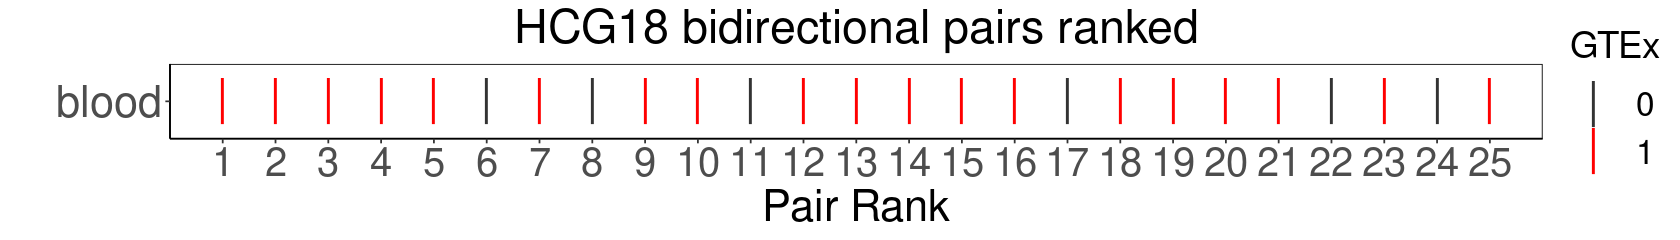

In [20]:
options(repr.plot.width=14, repr.plot.height=2)
hcg18_blood_plot <- plot_genie3_ranks(gene_linkList_genes=genie_path_DT, 
                                      tissue_id="blood", 
                                      gene_id="HCG18:NR_024052.2")

In [21]:
ggsave(hcg18_blood_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_blood_rank_plot.pdf',
      bg = "transparent")

ggsave(hcg18_blood_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_blood_rank_plot.png',
      bg = "transparent")

### Heart

           regulatoryGene        targetGene    weight
1: chr6:30763618-30764058 HCG18:NR_024052.2 0.1903535
2: chr6:31271950-31272366 HCG18:NR_024052.2 0.1466410
                                    pair_id gtex tissue ranks
1: HCG18:NR_024052.2~chr6:30763618-30764058    1  heart     1
2: HCG18:NR_024052.2~chr6:31271950-31272366    1  heart     2
   ranks tissue
1:    16  heart


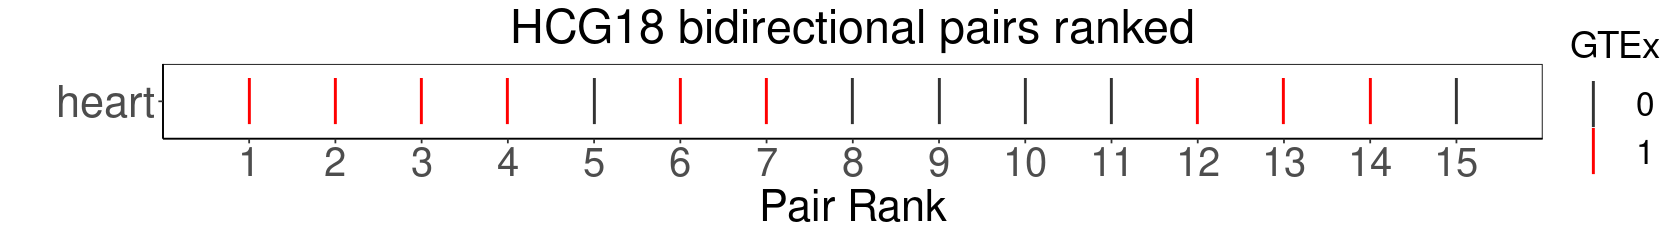

In [22]:
options(repr.plot.width=14, repr.plot.height=2)

hcg18_heart_plot <- plot_genie3_ranks(gene_linkList_genes=genie_path_DT,
                                      tissue_id="heart", 
                                      gene_id="HCG18:NR_024052.2")

In [23]:
ggsave(hcg18_heart_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_heart_rank_plot.pdf',
      bg = "transparent")

ggsave(hcg18_heart_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_heart_rank_plot.png',
      bg = "transparent")

### Prostate

           regulatoryGene        targetGene     weight
1: chr6:31271950-31272366 HCG18:NR_024052.2 0.12472306
2: chr6:30616888-30617254 HCG18:NR_024052.2 0.08525263
                                    pair_id gtex   tissue ranks
1: HCG18:NR_024052.2~chr6:31271950-31272366    1 prostate     1
2: HCG18:NR_024052.2~chr6:30616888-30617254    0 prostate     2
   ranks   tissue
1:    25 prostate


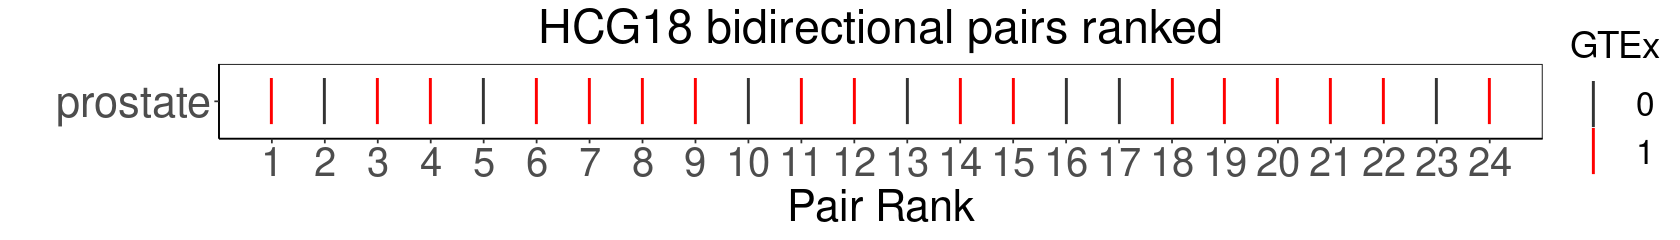

In [24]:
options(repr.plot.width=14, repr.plot.height=2)

hcg18_prostate_plot <- plot_genie3_ranks(gene_linkList_genes=genie_path_DT,
                                      tissue_id="prostate", 
                                      gene_id="HCG18:NR_024052.2")

In [25]:
ggsave(hcg18_prostate_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_prostate_rank_plot.pdf',
      bg = "transparent")

ggsave(hcg18_prostate_plot, width = 14, height = 2,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_prostate_rank_plot.png',
      bg = "transparent")

### All tissues

In [26]:
genie_path_DT_rank_hcg18 <- subset(genie_path_DT, 
                                   targetGene == "HCG18:NR_024052.2")
head(genie_path_DT_rank_hcg18, 10)

regulatoryGene,targetGene,weight,pair_id,gtex,tissue,ranks
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
chr6:29968305-29968945,HCG18:NR_024052.2,0.29340172,HCG18:NR_024052.2~chr6:29968305-29968945,1,blood,1
chr6:31277093-31277505,HCG18:NR_024052.2,0.17084109,HCG18:NR_024052.2~chr6:31277093-31277505,1,blood,2
chr6:29647641-29648589,HCG18:NR_024052.2,0.15046305,HCG18:NR_024052.2~chr6:29647641-29648589,1,blood,3
chr6:29962770-29963220,HCG18:NR_024052.2,0.07196084,HCG18:NR_024052.2~chr6:29962770-29963220,1,blood,4
chr6:30754630-30754950,HCG18:NR_024052.2,0.05023517,HCG18:NR_024052.2~chr6:30754630-30754950,1,blood,5
chr6:29645590-29645880,HCG18:NR_024052.2,0.04944096,HCG18:NR_024052.2~chr6:29645590-29645880,0,blood,6
chr6:31076258-31078308,HCG18:NR_024052.2,0.03507099,HCG18:NR_024052.2~chr6:31076258-31078308,1,blood,7
chr6:30869415-30869971,HCG18:NR_024052.2,0.02739331,HCG18:NR_024052.2~chr6:30869415-30869971,0,blood,8
chr6:30862432-30862720,HCG18:NR_024052.2,0.01811145,HCG18:NR_024052.2~chr6:30862432-30862720,1,blood,9


In [27]:
genie_path_DT_rank_hcg18 <- subset(genie_path_DT, 
                                   targetGene == "HCG18:NR_024052.2")
head(genie_path_DT_rank_hcg18, 10)

regulatoryGene,targetGene,weight,pair_id,gtex,tissue,ranks
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
chr6:29968305-29968945,HCG18:NR_024052.2,0.29340172,HCG18:NR_024052.2~chr6:29968305-29968945,1,blood,1
chr6:31277093-31277505,HCG18:NR_024052.2,0.17084109,HCG18:NR_024052.2~chr6:31277093-31277505,1,blood,2
chr6:29647641-29648589,HCG18:NR_024052.2,0.15046305,HCG18:NR_024052.2~chr6:29647641-29648589,1,blood,3
chr6:29962770-29963220,HCG18:NR_024052.2,0.07196084,HCG18:NR_024052.2~chr6:29962770-29963220,1,blood,4
chr6:30754630-30754950,HCG18:NR_024052.2,0.05023517,HCG18:NR_024052.2~chr6:30754630-30754950,1,blood,5
chr6:29645590-29645880,HCG18:NR_024052.2,0.04944096,HCG18:NR_024052.2~chr6:29645590-29645880,0,blood,6
chr6:31076258-31078308,HCG18:NR_024052.2,0.03507099,HCG18:NR_024052.2~chr6:31076258-31078308,1,blood,7
chr6:30869415-30869971,HCG18:NR_024052.2,0.02739331,HCG18:NR_024052.2~chr6:30869415-30869971,0,blood,8
chr6:30862432-30862720,HCG18:NR_024052.2,0.01811145,HCG18:NR_024052.2~chr6:30862432-30862720,1,blood,9


In [28]:
length(unique(genie_path_DT_rank_hcg18$pair_id))

[1] 96

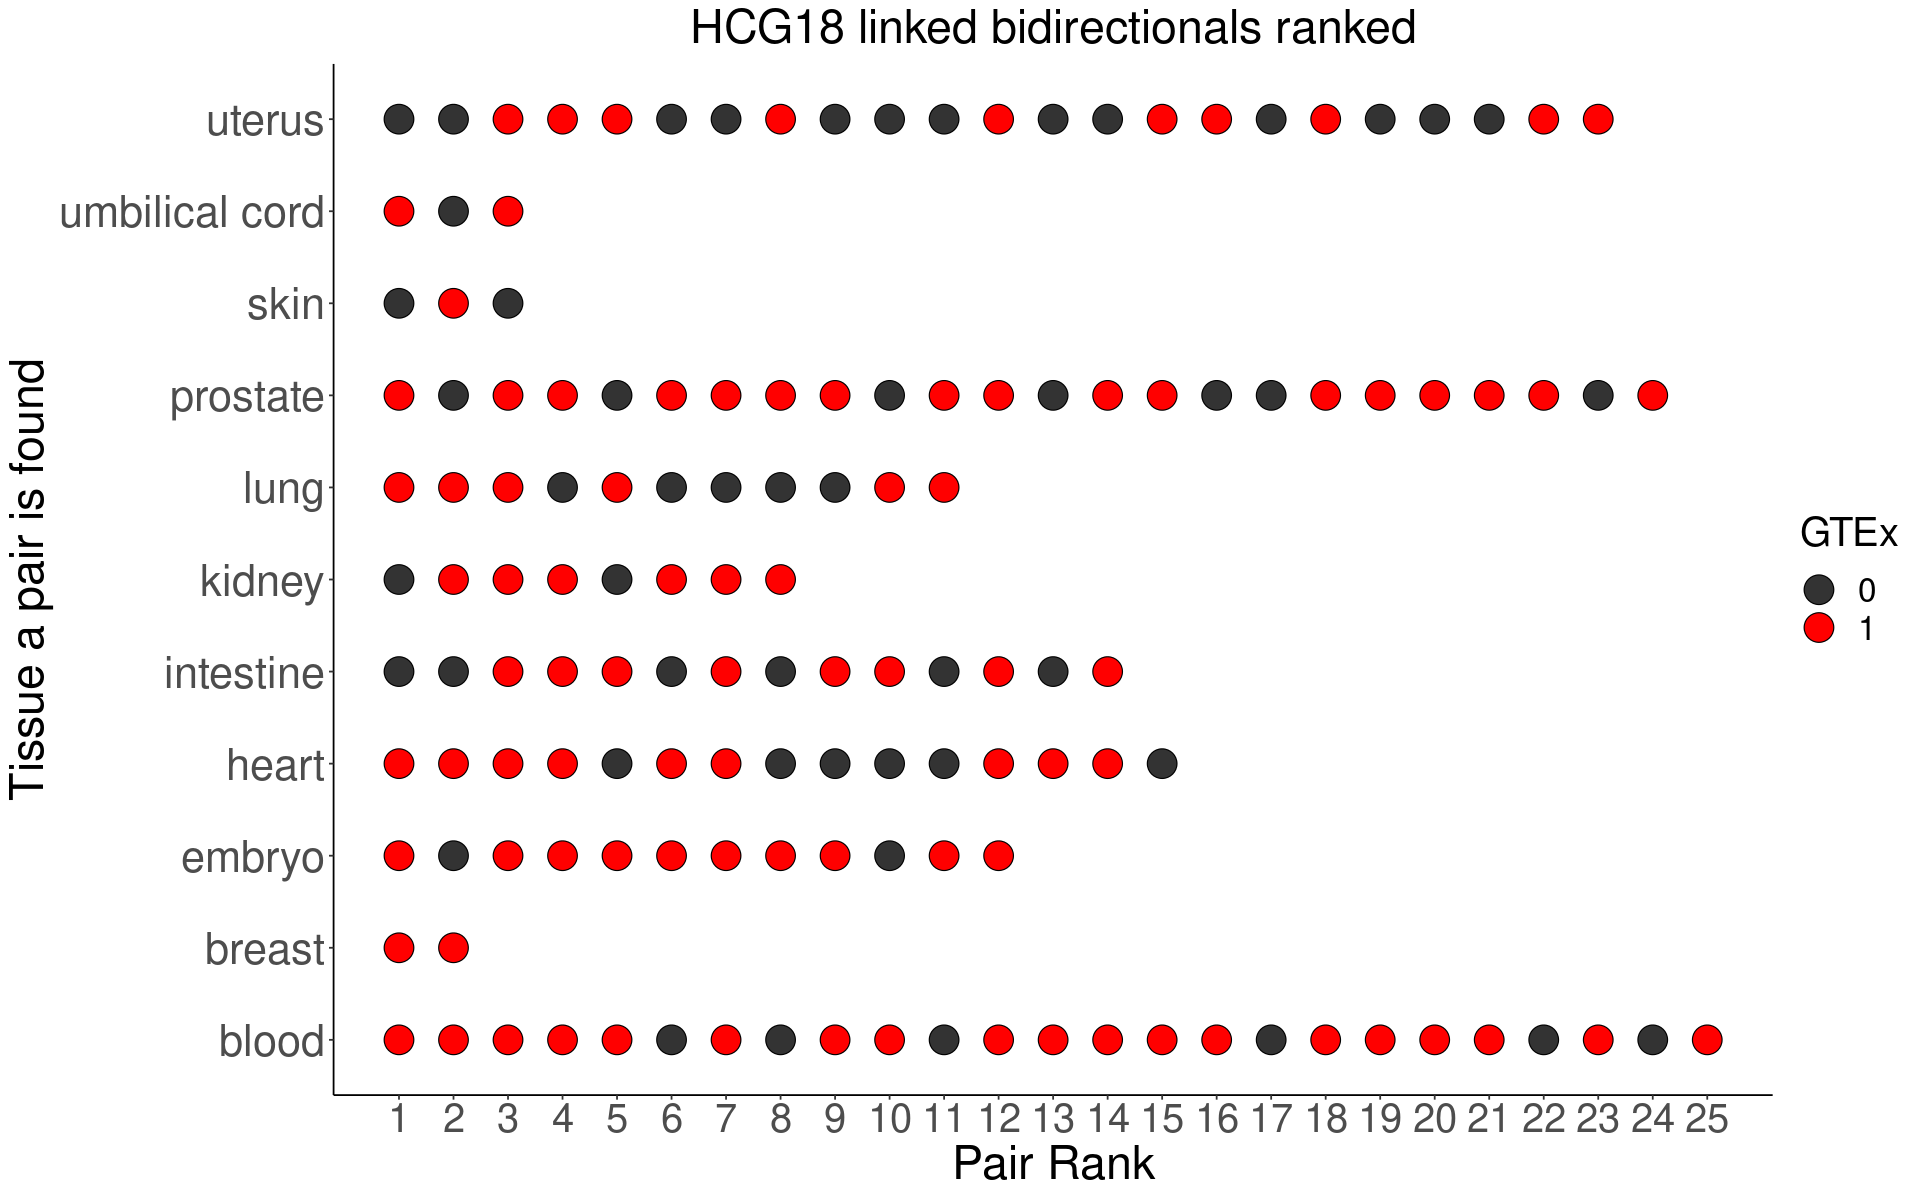

In [29]:
options(repr.plot.width=16, repr.plot.height=10)

#print(gene_linkList_genes$ranks)

rank_plot <- ggplot(data=genie_path_DT_rank_hcg18, 
                    aes(y=tissue,
                        x=ranks,
                        fill=as.character(gtex))) +
#geom_bar(stat="identity", fill = 'white', color='black') +
geom_point(shape=21, 
           size=8, 
           alpha=1) +
xlab("Pair Rank") +
ylab("Tissue a pair is found") +
ggtitle("HCG18 linked bidirectionals ranked") +
theme_classic() +
scale_fill_manual(name="GTEx",
                    values = c("grey20", "red")) +
scale_x_continuous(#expand = c(0, 0), 
                   breaks = unique(genie_path_DT_rank_hcg18$ranks),
                   labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5, 
                                face = "plain",
                                size = 28),
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 26),
      axis.text.x = element_text(size = 24),
      legend.title = element_text(size = 24),
      legend.text = element_text(size = 20))
rank_plot

In [30]:
ggsave(rank_plot, width = 16, height = 10,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_ranks_all_tissues_plot.pdf',
      bg = "transparent")

ggsave(rank_plot, width = 16, height = 10,
       filename = '/Users/rusi2317/projects/meta_analysis_qc/hg38/paper_figures/genie3_hcg18_ranks_all_tissues_plot.png',
      bg = "transparent")

## CCHCR1:NM_001105563.3

### All tissues

In [31]:
genie_path_DT_rank_cchcr1 <- subset(genie_path_DT, 
                                   targetGene == "CCHCR1:NM_001105563.3")
head(genie_path_DT_rank_cchcr1)

regulatoryGene,targetGene,weight,pair_id,gtex,tissue,ranks
<chr>,<chr>,<dbl>,<chr>,<int>,<chr>,<int>
chr6:32133868-32134084,CCHCR1:NM_001105563.3,0.53441422,CCHCR1:NM_001105563.3~chr6:32133868-32134084,1,breast,1
chr6:31614845-31615099,CCHCR1:NM_001105563.3,0.42163547,CCHCR1:NM_001105563.3~chr6:31614845-31615099,0,breast,2
chr6:31373752-31374344,CCHCR1:NM_001105563.3,0.04395031,CCHCR1:NM_001105563.3~chr6:31373752-31374344,1,breast,3
chr6:31085904-31086302,CCHCR1:NM_001105563.3,0.26157049,CCHCR1:NM_001105563.3~chr6:31085904-31086302,1,heart,1
chr6:31196999-31197381,CCHCR1:NM_001105563.3,0.15436427,CCHCR1:NM_001105563.3~chr6:31196999-31197381,1,heart,2
chr6:31815397-31815591,CCHCR1:NM_001105563.3,0.11259173,CCHCR1:NM_001105563.3~chr6:31815397-31815591,1,heart,3


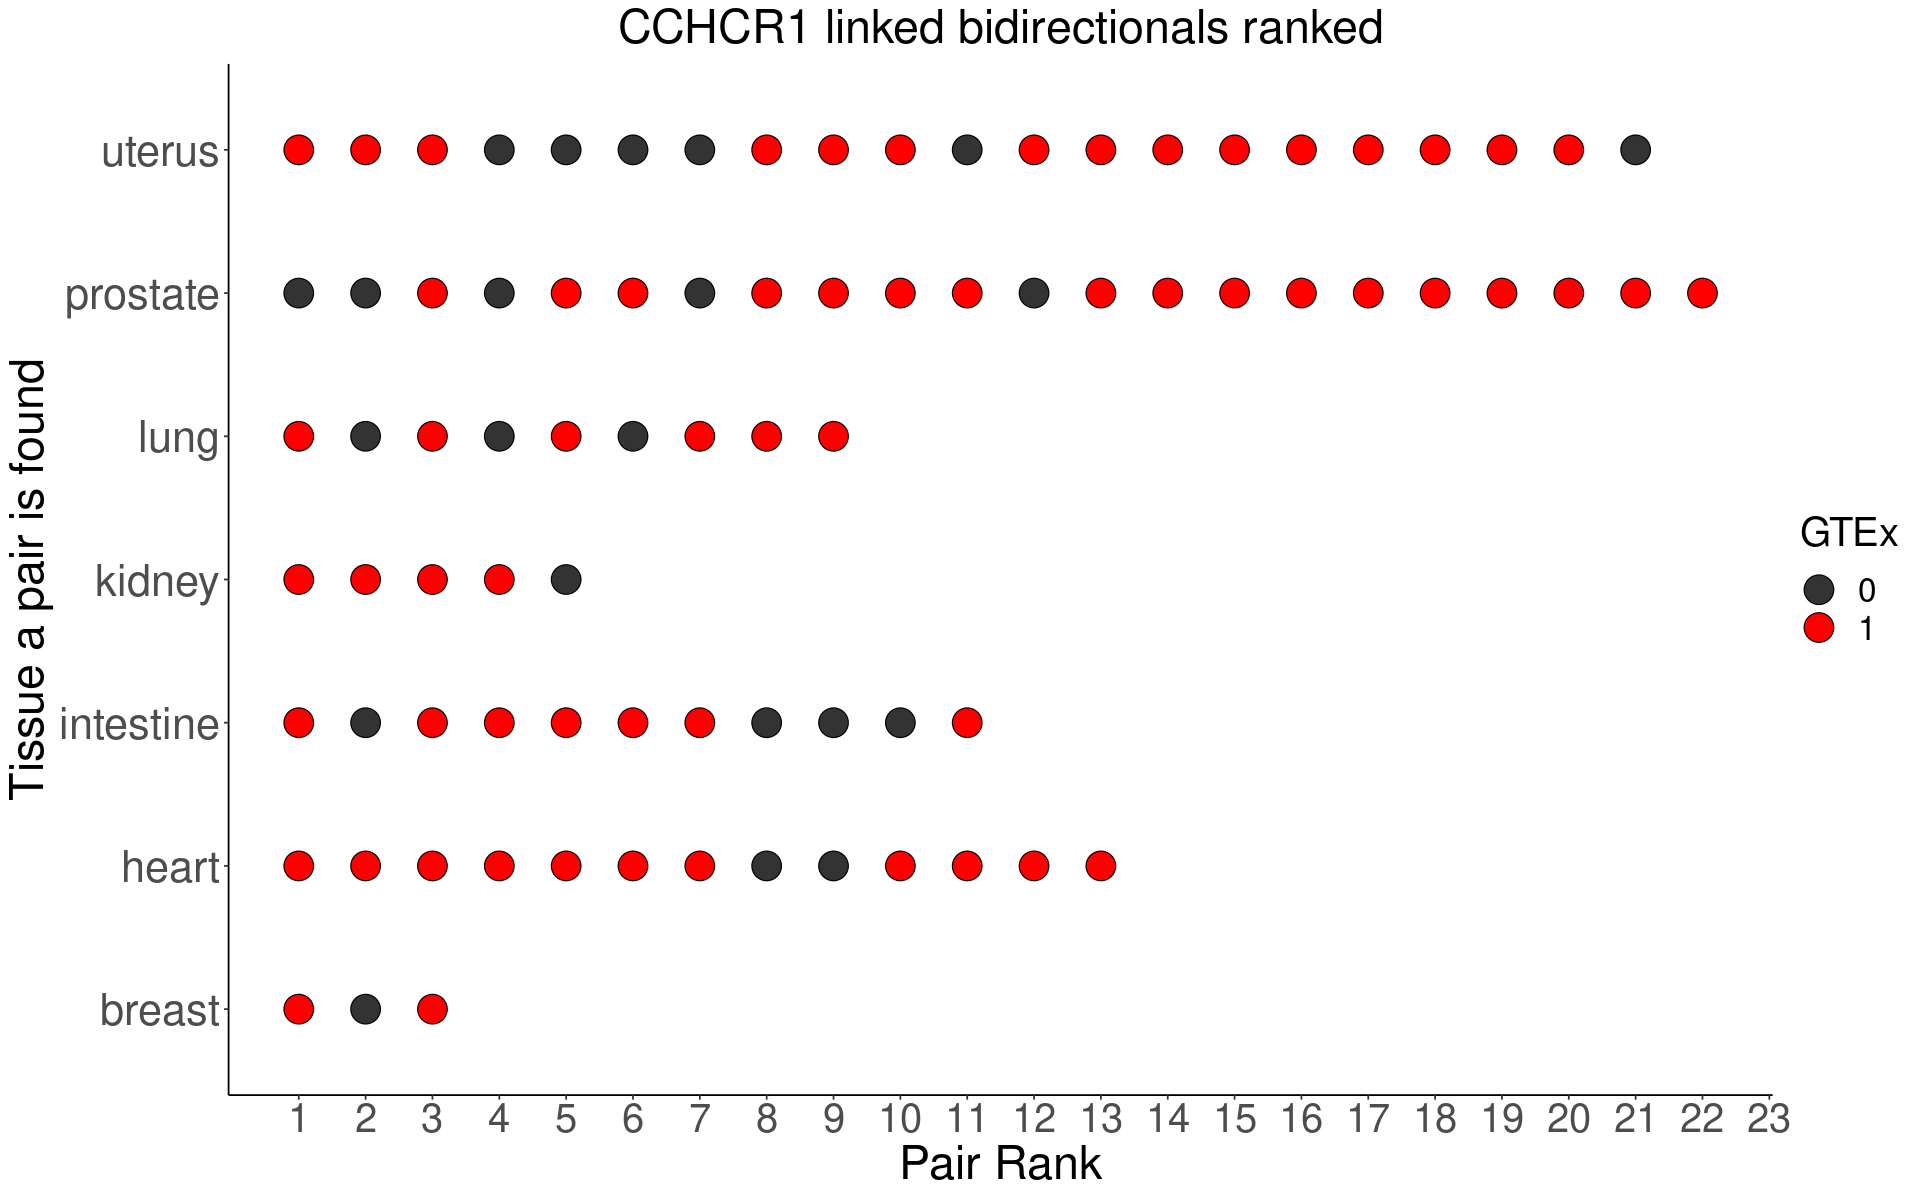

In [32]:
options(repr.plot.width=16, repr.plot.height=10)

rank_plot_cchcr1 <- ggplot(data=genie_path_DT_rank_cchcr1, 
                    aes(y=tissue,
                        x=ranks,
                        fill=as.character(gtex))) +
geom_point(shape=21, 
           size=8, 
           alpha=1) +
xlab("Pair Rank") +
ylab("Tissue a pair is found") +
ggtitle("CCHCR1 linked bidirectionals ranked") +
theme_classic() +
scale_fill_manual(name="GTEx",
                    values = c("grey20", "red")) +
scale_x_continuous(#expand = c(0, 0), 
                   breaks = unique(genie_path_DT_rank_hcg18$ranks),
                   labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5, 
                                face = "plain",
                                size = 28),
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 26),
      axis.text.x = element_text(size = 24),
      legend.title = element_text(size = 24),
      legend.text = element_text(size = 20))
rank_plot_cchcr1

## ZNF204P:NR_002722.2

### All tissues

In [33]:
genie_path_DT_rank_znf204p <- subset(genie_path_DT, 
                                   targetGene == "ZNF204P:NR_002722.2")

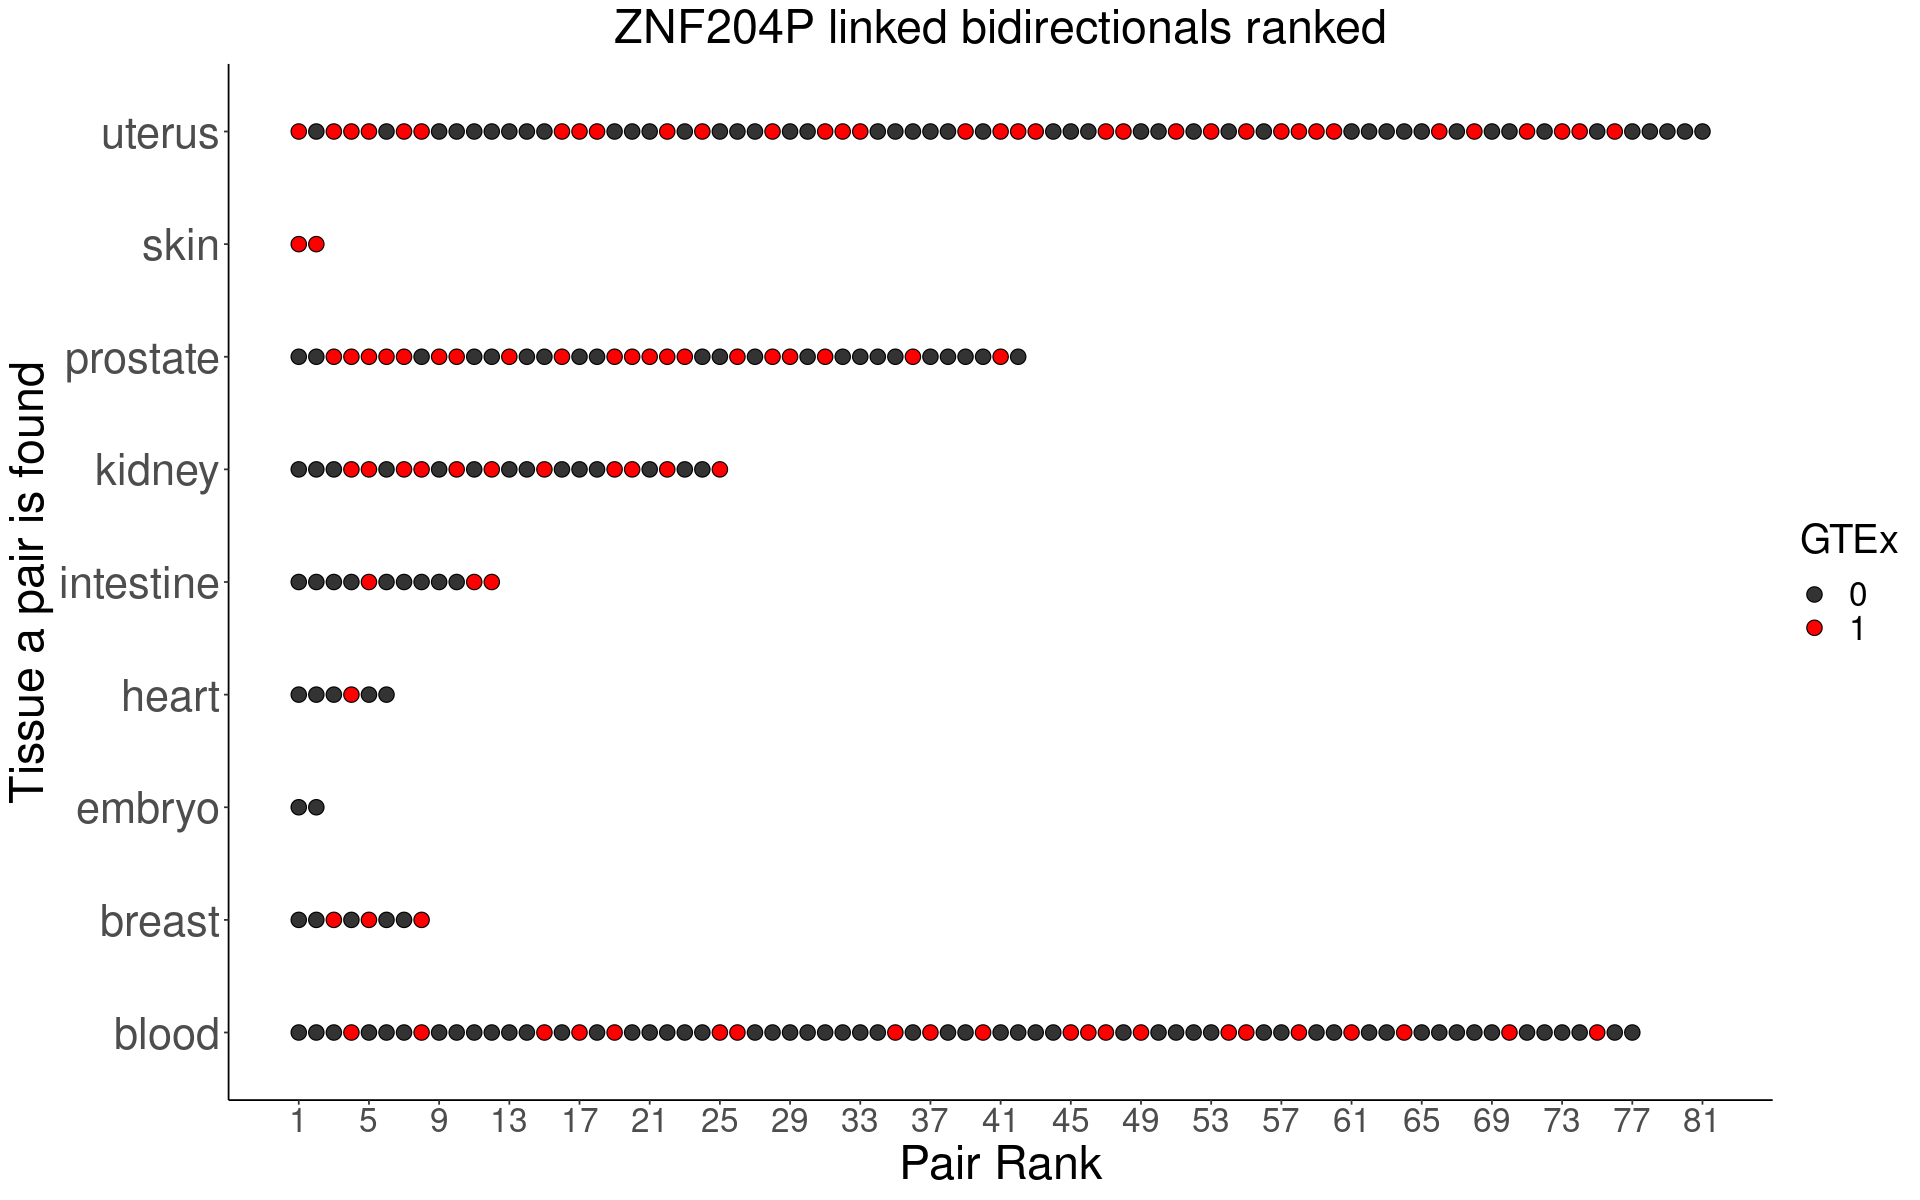

In [34]:
options(repr.plot.width=16, repr.plot.height=10)

rank_plot_znf204p <- ggplot(data=genie_path_DT_rank_znf204p, 
                    aes(y=tissue,
                        x=ranks,
                        fill=as.character(gtex))) +
geom_point(shape=21, 
           size=4, 
           alpha=1) +
xlab("Pair Rank") +
ylab("Tissue a pair is found") +
ggtitle("ZNF204P linked bidirectionals ranked") +
theme_classic() +
scale_fill_manual(name="GTEx",
                    values = c("grey20", "red")) +
scale_x_continuous(#expand = c(0, 0), 
                   breaks = seq(1,max(unique(genie_path_DT_rank_znf204p$ranks)), 4),
                   labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5, 
                                face = "plain",
                                size = 28),
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 26),
      axis.text.x = element_text(size = 20),
      legend.title = element_text(size = 24),
      legend.text = element_text(size = 20))

rank_plot_znf204p

## FLOT1:NM_005803.4

### All tissues

In [35]:
genie_path_DT_rank_flot1 <- subset(genie_path_DT, 
                                   targetGene == "FLOT1:NM_005803.4")

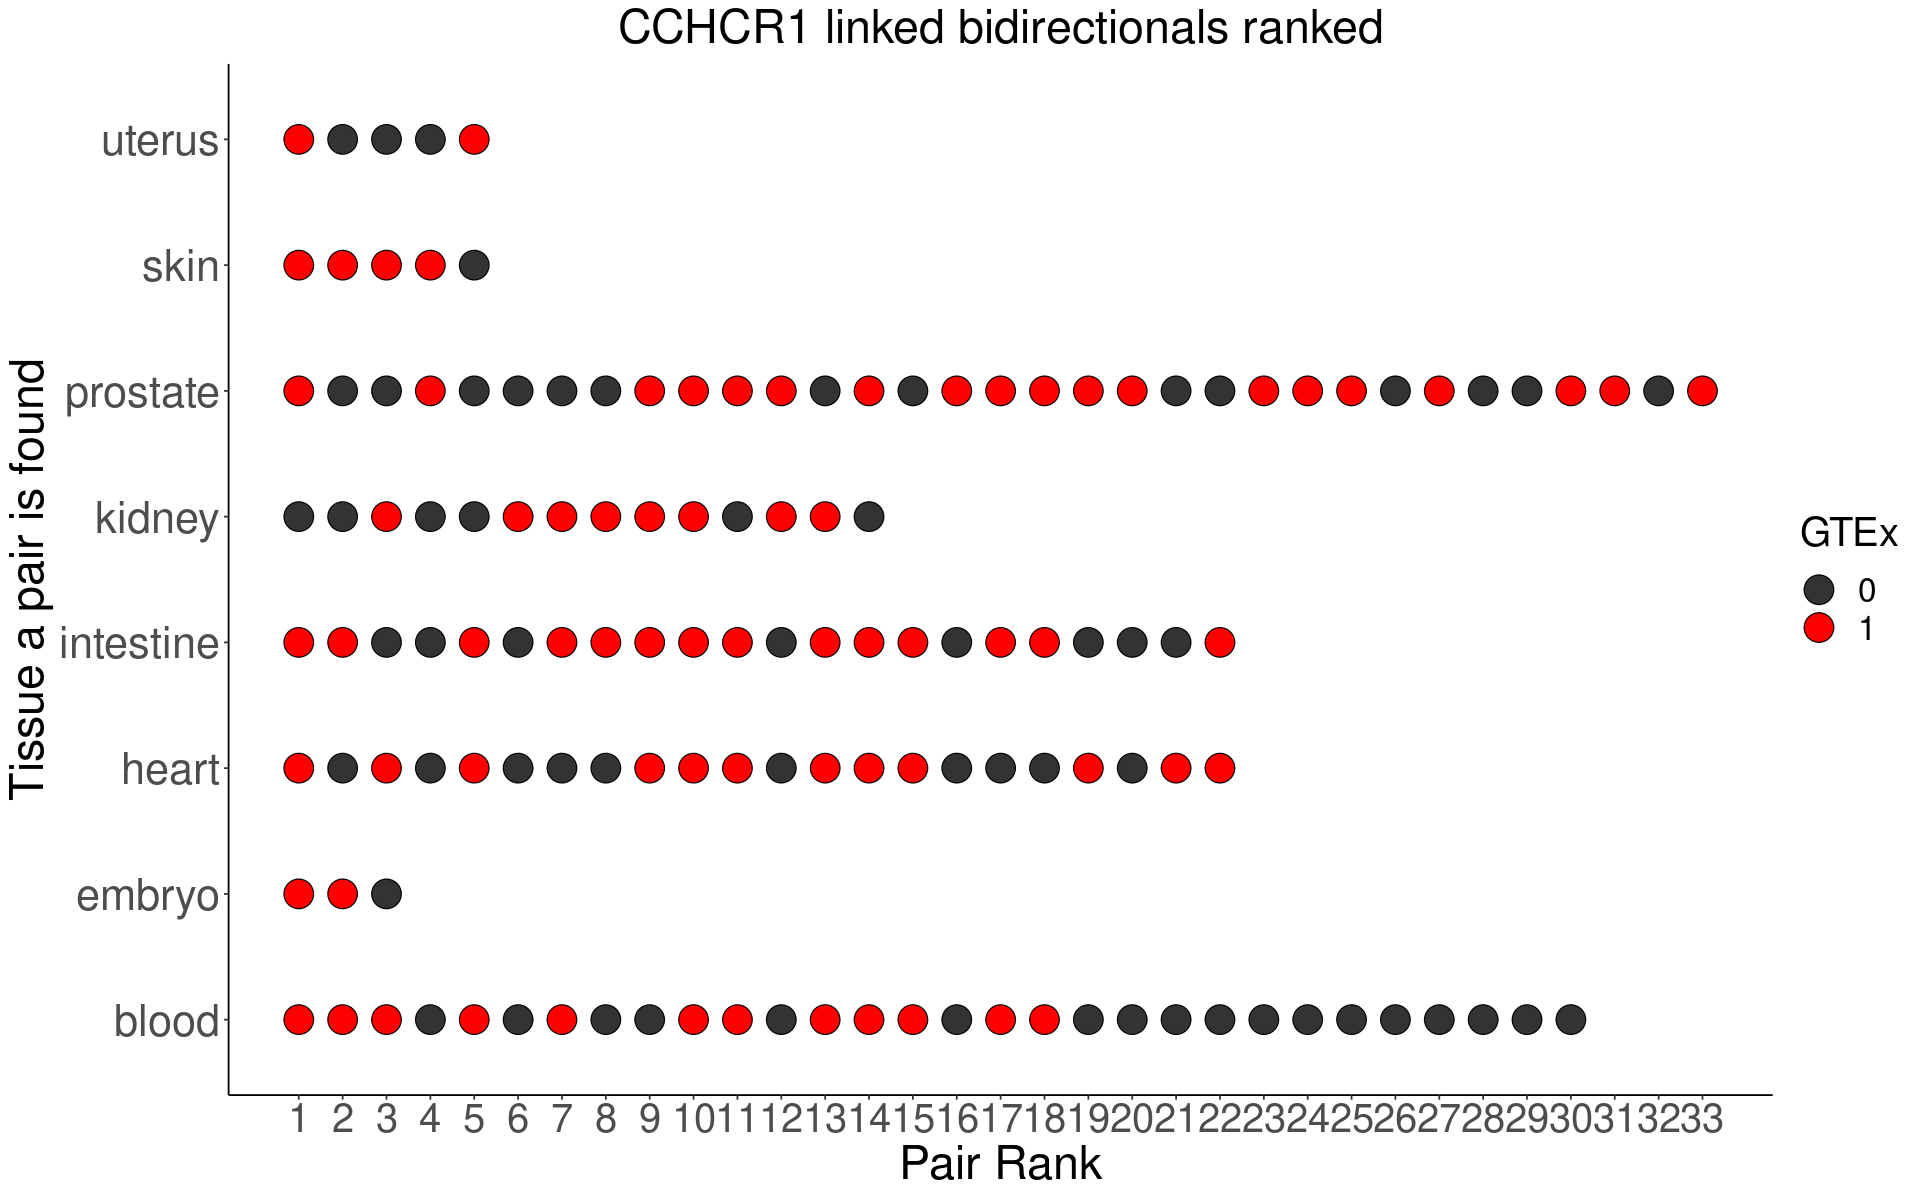

In [36]:
options(repr.plot.width=16, repr.plot.height=10)

rank_plot_flot1 <- ggplot(data=genie_path_DT_rank_flot1, 
                    aes(y=tissue,
                        x=ranks,
                        fill=as.character(gtex))) +
geom_point(shape=21, 
           size=8, 
           alpha=1) +
xlab("Pair Rank") +
ylab("Tissue a pair is found") +
ggtitle("CCHCR1 linked bidirectionals ranked") +
theme_classic() +
scale_fill_manual(name="GTEx",
                    values = c("grey20", "red")) +
scale_x_continuous(#expand = c(0, 0), 
                   breaks = unique(genie_path_DT_rank_flot1$ranks),
                   labels = scales::comma) +
theme(plot.title = element_text(hjust = 0.5, 
                                face = "plain",
                                size = 28),
      axis.title = element_text(size = 28), 
      axis.text = element_text(size = 26),
      axis.text.x = element_text(size = 24),
      legend.title = element_text(size = 24),
      legend.text = element_text(size = 20))

rank_plot_flot1

# Session Information

In [37]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /usr/lib64/libopenblasp-r0.3.3.so;  LAPACK version 3.8.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Denver
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1     ggplot2_3.4.4     data.table_1.14.8 GENIE3_1.22.0    

loaded via a namespace (and not attached):
 [1] crayon_1.5.2      vctrs_0.6.4       cli_3.6.1         rlang_1.1.1      
 [5] generics_0.1.3    jsonlite_1.8.7    labeling_0.4.3  